In [10]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go
import plotly.express as px

import ipywidgets as widgets

import pandas as pd
import datetime
import seaborn as sb

In [11]:
sb.set()

In [12]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of 4-aminopyridine (Metabolite_id = 1175)

In [13]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select metabolite_id, 
                                        metab_name,
                                        provider_name, 
                                        date, 
                                        max(price_per_g) as maximo, 
                                        avg(price_per_g) as media, 
                                        min(price_per_g) as minimo, 
                                        count(price) as num_price
                                        from (
                                                select bioanalysis_metabolite_price.metabolite_id,
                                                       bioanalysis_metabolite.common_name                    as metab_name,
                                                       bioanalysis_metabolite_price.date, 
                                                       bioanalysis_metabolite_price.price                    as price, 
                                                       bioanalysis_metabolite_price.amount                   as amount, 
                                                       bioanalysis_metabolite_price.unity                    as unity, 
                                                       if(provider.name is null, "None", provider.name)      as provider_name, 
                                                       price/amount                                          as price_per_unity,
                                                       price/amount*convert_to_g(unity)                      as price_per_g,
                                                       price/amount*convert_to_l(unity)                      as price_per_l
                                                from bioanalysis_metabolite_price
                                                JOIN provider 
                                                    on provider.id = bioanalysis_metabolite_price.provider_id
                                                JOIN bioanalysis_metabolite
                                                    on bioanalysis_metabolite_price.metabolite_id = bioanalysis_metabolite.id
                                                where (convert_to_g(unity) is not null 
                                                or convert_to_l(unity) is not null )       #da apenas os preços por grama, litro e derivados
                                        ) as metab_prices
                                        where metabolite_id= 1175
                                        group by metabolite_id, provider_name,  year(date), month(date); ''', cnx, index_col = 'date', parse_dates=True) 


df = pd.DataFrame(sql_query, columns=['metabolite_id', 'metab_name', 'provider_name', 'maximo', 'media', 'minimo', 'num_price' ])


In [14]:
df

,metabolite_id,metab_name,provider_name,maximo,media,minimo,num_price
date,,,,,,,
2017-10-10 10:27:08,1175,4-aminopyridine,ENAMINE Ltd.,0.055000,0.009826,0.002350,14
2017-10-10 10:27:08,1175,4-aminopyridine,"Vitas-M Laboratory, Ltd.",0.038000,0.011451,0.002570,8
2017-10-10 10:27:08,1175,4-aminopyridine,"Maybridge, Ltd.",0.066880,0.014199,0.002414,14
2017-10-10 10:27:08,1175,4-aminopyridine,HTS Biochemie Innovationen,400.000000,40.007650,0.000560,10
2017-10-10 10:27:08,1175,4-aminopyridine,Tocris Bioscience,0.001000,0.001000,0.001000,1
2017-10-10 10:27:08,1175,4-aminopyridine,"Otava, Ltd.",0.024900,0.008923,0.002920,9
2017-10-10 10:27:08,1175,4-aminopyridine,BIONET/Key Organics Ltd.,0.038850,0.008941,0.000800,14
2017-10-10 10:27:08,1175,4-aminopyridine,"Alinda Chemical, Ltd.",0.015000,0.003689,0.001000,9
2017-10-10 10:27:08,1175,4-aminopyridine,TargetMol,0.002000,0.001753,0.001560,3


In [15]:
pd.isnull(df).sum()

metabolite_id    0
metab_name       0
provider_name    0
maximo           0
media            0
minimo           0
num_price        0
dtype: int64

In [7]:
# df = df.resample('M').mean()

In [16]:
grouped_df = df.groupby(df.provider_name)

for key, item in grouped_df:
    print('key:', key)
    print(grouped_df.get_group(key), "\n\n")

key: AA BLOCKS
                     metabolite_id       metab_name provider_name  maximo  \
date                                                                        
2019-06-14 11:14:45           1175  4-aminopyridine     AA BLOCKS    17.0   
2019-07-14 11:30:51           1175  4-aminopyridine     AA BLOCKS    17.0   

                        media  minimo  num_price  
date                                              
2019-06-14 11:14:45  8.893333    3.08          3  
2019-07-14 11:30:51  8.893333    3.08          3   


key: ACC Corporation
                     metabolite_id       metab_name    provider_name  \
date                                                                   
2017-10-10 10:27:10           1175  4-aminopyridine  ACC Corporation   
2018-01-10 11:35:20           1175  4-aminopyridine  ACC Corporation   
2018-02-10 11:41:22           1175  4-aminopyridine  ACC Corporation   
2018-03-10 11:43:03           1175  4-aminopyridine  ACC Corporation   
2018-04-10 10:43

2019-06-14 11:14:47     5.5  2.422200   1.177          5   


key: BLD Pharmatech Ltd.
                     metabolite_id       metab_name        provider_name  \
date                                                                       
2018-08-22 23:27:09           1175  4-aminopyridine  BLD Pharmatech Ltd.   
2018-09-22 23:27:40           1175  4-aminopyridine  BLD Pharmatech Ltd.   
2018-10-22 23:30:51           1175  4-aminopyridine  BLD Pharmatech Ltd.   
2018-11-23 00:35:42           1175  4-aminopyridine  BLD Pharmatech Ltd.   
2018-12-06 18:35:39           1175  4-aminopyridine  BLD Pharmatech Ltd.   
2019-01-06 18:35:57           1175  4-aminopyridine  BLD Pharmatech Ltd.   
2019-02-06 18:36:03           1175  4-aminopyridine  BLD Pharmatech Ltd.   
2019-03-06 18:36:19           1175  4-aminopyridine  BLD Pharmatech Ltd.   
2019-04-06 17:37:27           1175  4-aminopyridine  BLD Pharmatech Ltd.   
2019-05-06 17:38:39           1175  4-aminopyridine  BLD Pharmatech Ltd.   
2

2018-12-06 18:35:40          1   


key: Selleck Chemicals LLC
                     metabolite_id       metab_name          provider_name  \
date                                                                         
2018-08-22 23:27:08           1175  4-aminopyridine  Selleck Chemicals LLC   
2018-09-22 23:27:39           1175  4-aminopyridine  Selleck Chemicals LLC   
2018-10-22 23:30:51           1175  4-aminopyridine  Selleck Chemicals LLC   
2018-11-23 00:35:41           1175  4-aminopyridine  Selleck Chemicals LLC   
2018-12-06 18:35:38           1175  4-aminopyridine  Selleck Chemicals LLC   
2019-01-06 18:35:56           1175  4-aminopyridine  Selleck Chemicals LLC   
2019-02-06 18:36:03           1175  4-aminopyridine  Selleck Chemicals LLC   
2019-03-06 18:36:19           1175  4-aminopyridine  Selleck Chemicals LLC   
2019-04-06 17:37:26           1175  4-aminopyridine  Selleck Chemicals LLC   
2019-05-06 17:38:38           1175  4-aminopyridine  Selleck Chemicals LLC   
2

In [17]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of 4-aminopyridine (Price/g)',
    yaxis = dict(
        title = 'price (USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)

prov_list = []
for key, item in grouped_df:
    prov_list.append(key)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['provider_name'])['media']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
   data = []
   for s in signals:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines+markers',
           name = 'provider {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('AA BLOCKS', 'ACC Corporation', 'AD Chem…

In [9]:
cnx.close()

#### Boxplot - Outliers

In [18]:
grouped_df = df.groupby(df.index)

for key, item in grouped_df:
    print('key:', key)
    print(grouped_df.get_group(key), "\n\n")

key: 2017-10-10 10:27:08
                     metabolite_id       metab_name  \
date                                                  
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-aminopyridine   
2017-10-10 10:27:08           1175  4-am

2018-06-11 21:49:39   0.022400          6   


key: 2018-06-11 21:49:40
                     metabolite_id       metab_name  \
date                                                  
2018-06-11 21:49:40           1175  4-aminopyridine   
2018-06-11 21:49:40           1175  4-aminopyridine   
2018-06-11 21:49:40           1175  4-aminopyridine   
2018-06-11 21:49:40           1175  4-aminopyridine   
2018-06-11 21:49:40           1175  4-aminopyridine   

                                 provider_name  maximo      media  minimo  \
date                                                                        
2018-06-11 21:49:40        Accela ChemBio Inc.    2.72   2.450000    2.18   
2018-06-11 21:49:40                AOBChem USA    4.60   3.426667    2.28   
2018-06-11 21:49:40       Arctom Chemicals LLC    3.20   3.200000    3.20   
2018-06-11 21:49:40               Astatech Inc    2.40   1.600000    0.90   
2018-06-11 21:49:40  Biocore Pharmtech Limited   62.00  28.480000    5.84   

  

2019-01-06 18:36:00          2   


key: 2019-02-06 18:36:03
                     metabolite_id       metab_name  \
date                                                  
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019-02-06 18:36:03           1175  4-aminopyridine   
2019

In [19]:
df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of 4-aminopyridine (Price/g)',
    yaxis = dict(
        title = 'price (USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)

opt_list = []
for key, item in grouped_df:
    opt_list.append(key)

# for d in df.index:
    
    

d_x = {}
d_y = {}
# dates =[]   #lista com as datas exatas que existem na dataframe
for k,g in df.groupby(df.index)['media']:
    x = pd.to_datetime(g.index)
#     dates.append(x)
    y = g.values
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a provider lacking on the x or y dict.')
    

# opt_list = []
# for date in opt:
#     if date  dates:
#         opt_list.append(date)
        
# print(opt)


def update_plot(signals):#, freq):
   data = []
   for s in signals:
       trace1 = go.Box(
           x = d_x[s],
           y = d_y[s],
           name = 'time {}'.format(s),
           boxpoints='outliers',
           marker=dict(
               color='rgb(8,81,156)',
               outliercolor='rgba(219, 64, 82, 0.6)',
               line=dict(
                   outliercolor='rgba(219, 64, 82, 0.6)',
                   outlierwidth=2)),
           line_color='rgb(8,81,156)'
           
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
signals = widgets.SelectMultiple(options = opt_list, description = 'Time')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Time', options=(Timestamp('2017-10-10 10:27:08'), Timestamp(…

#### BOXPLOT - MONTH only

In [13]:
dfM = df.to_period('D')

In [14]:
dfM

,metabolite_id,metab_name,provider_name,maximo,media,minimo,num_price
date,,,,,,,
2017-10-10,1175,4-aminopyridine,ENAMINE Ltd.,0.055000,0.009826,0.002350,14
2017-10-10,1175,4-aminopyridine,"Vitas-M Laboratory, Ltd.",0.038000,0.011451,0.002570,8
2017-10-10,1175,4-aminopyridine,"Maybridge, Ltd.",0.066880,0.014199,0.002414,14
2017-10-10,1175,4-aminopyridine,HTS Biochemie Innovationen,400.000000,40.007650,0.000560,10
2017-10-10,1175,4-aminopyridine,Tocris Bioscience,0.001000,0.001000,0.001000,1
2017-10-10,1175,4-aminopyridine,"Otava, Ltd.",0.024900,0.008923,0.002920,9
2017-10-10,1175,4-aminopyridine,BIONET/Key Organics Ltd.,0.038850,0.008941,0.000800,14
2017-10-10,1175,4-aminopyridine,"Alinda Chemical, Ltd.",0.015000,0.003689,0.001000,9
2017-10-10,1175,4-aminopyridine,TargetMol,0.002000,0.001753,0.001560,3


In [15]:
grouped_dfM = dfM.groupby(dfM.index)

for key, item in grouped_dfM:
    print('key:', key)
    print(grouped_dfM.get_group(key), "\n\n")

key: 2017-10-10
            metabolite_id       metab_name  \
date                                         
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10           1175  4-aminopyridine   
2017-10-10        

In [18]:
dfM.index 

PeriodIndex(['2017-10-10', '2017-10-10', '2017-10-10', '2017-10-10',
             '2017-10-10', '2017-10-10', '2017-10-10', '2017-10-10',
             '2017-10-10', '2017-10-10',
             ...
             '2019-07-14', '2019-07-14', '2019-07-14', '2019-07-14',
             '2019-07-14', '2019-07-14', '2019-07-14', '2019-07-14',
             '2019-07-14', '2019-07-14'],
            dtype='period[D]', name='date', length=873, freq='D')

In [19]:
dfM.index = dfM.index.to_timestamp() # passar isto para datetime64!!! 
dfM.index

DatetimeIndex(['2017-10-10', '2017-10-10', '2017-10-10', '2017-10-10',
               '2017-10-10', '2017-10-10', '2017-10-10', '2017-10-10',
               '2017-10-10', '2017-10-10',
               ...
               '2019-07-14', '2019-07-14', '2019-07-14', '2019-07-14',
               '2019-07-14', '2019-07-14', '2019-07-14', '2019-07-14',
               '2019-07-14', '2019-07-14'],
              dtype='datetime64[ns]', name='date', length=873, freq=None)

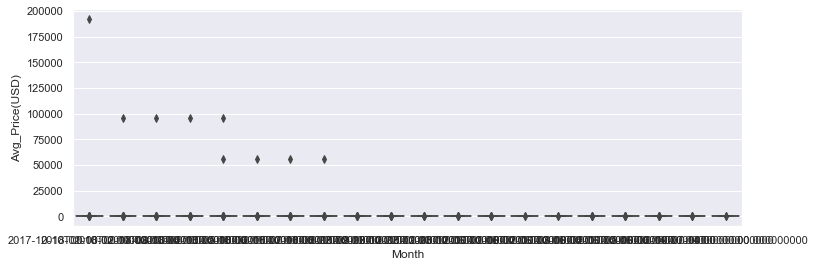

In [20]:
dfM = dfM.sort_index()


fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sb.boxplot(x=dfM.index, y=dfM.media, data=dfM, ax=ax)
plt.xlabel('Month')
plt.ylabel('Avg_Price(USD)')
plt.show()

In [21]:
for d in dfM.index:
    print(d)

2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2017-10-10 00:00:00
2018-01-10 00:00:00
2018-01-10 00:00:00
2018-01-10 00:00:00
2018-01-10 00:00:00
2018-01-10 00:00:00
2018-01-10 00:00:00
2018-01-10 00:00:00
2018-01-10 00:00:00


In [22]:
dfM = dfM.sort_index()



layout = go.Layout(
    title = 'Time Series Plot of 4-aminopyridine (Price/g)',
    yaxis = dict(
        title = 'price (USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)



opt_list = []
d_x = {}
d_y = {}
# dates =[]   #lista com as datas exatas que existem na dataframe
for k,g in dfM.groupby(dfM.index)['media']:
    opt_list.append(k)
    x = pd.to_datetime(g.index)
#     dates.append(x)
    y = g.values
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a provider lacking on the x or y dict.')
    
    
def update_plot(signals):#, freq):
   data = []
   for s in signals:
       trace1 = go.Box(
           x = d_x[s],
           y = d_y[s],
           name = 'time {}'.format(s),
           boxpoints='outliers',
           marker=dict(
               color='rgb(8,81,156)',
               outliercolor='rgba(219, 64, 82, 0.6)',
               line=dict(
                   outliercolor='rgba(219, 64, 82, 0.6)',
                   outlierwidth=2)),
           line_color='rgb(8,81,156)'
           
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
signals = widgets.SelectMultiple(options = opt_list, description = 'Time')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Time', options=(Timestamp('2017-10-10 00:00:00'), Timestamp(…

Tentar mesmo só a arredondar para mês em vez de dia como acima (suponho que o resultado seja o mesmo)

In [23]:
dfM1 = df.to_period('M')

In [24]:
dfM1

,metabolite_id,metab_name,provider_name,maximo,media,minimo,num_price
date,,,,,,,
2017-10,1175,4-aminopyridine,ENAMINE Ltd.,0.055000,0.009826,0.002350,14
2017-10,1175,4-aminopyridine,"Vitas-M Laboratory, Ltd.",0.038000,0.011451,0.002570,8
2017-10,1175,4-aminopyridine,"Maybridge, Ltd.",0.066880,0.014199,0.002414,14
2017-10,1175,4-aminopyridine,HTS Biochemie Innovationen,400.000000,40.007650,0.000560,10
2017-10,1175,4-aminopyridine,Tocris Bioscience,0.001000,0.001000,0.001000,1
2017-10,1175,4-aminopyridine,"Otava, Ltd.",0.024900,0.008923,0.002920,9
2017-10,1175,4-aminopyridine,BIONET/Key Organics Ltd.,0.038850,0.008941,0.000800,14
2017-10,1175,4-aminopyridine,"Alinda Chemical, Ltd.",0.015000,0.003689,0.001000,9
2017-10,1175,4-aminopyridine,TargetMol,0.002000,0.001753,0.001560,3


In [26]:
dfM1.index = dfM1.index.to_timestamp() # passar isto para datetime64!!! 
dfM1.index

DatetimeIndex(['2017-10-01', '2017-10-01', '2017-10-01', '2017-10-01',
               '2017-10-01', '2017-10-01', '2017-10-01', '2017-10-01',
               '2017-10-01', '2017-10-01',
               ...
               '2019-07-01', '2019-07-01', '2019-07-01', '2019-07-01',
               '2019-07-01', '2019-07-01', '2019-07-01', '2019-07-01',
               '2019-07-01', '2019-07-01'],
              dtype='datetime64[ns]', name='date', length=873, freq=None)

In [27]:
grouped_dfM1 = dfM1.groupby(dfM1.index)

for key, item in grouped_dfM1:
    print('key:', key)
    print(grouped_dfM1.get_group(key), "\n\n")

key: 2017-10-01 00:00:00
            metabolite_id       metab_name  \
date                                         
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-01           1175  4-aminopyridine   
2017-10-0

In [28]:
dfM1 = dfM1.sort_index()



layout = go.Layout(
    title = 'Time Series Plot of 4-aminopyridine (Price/g)',
    yaxis = dict(
        title = 'price (USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)



opt_list = []
d_x = {}
d_y = {}
# dates =[]   #lista com as datas exatas que existem na dataframe
for k,g in dfM1.groupby(dfM1.index)['media']:
    opt_list.append(k)
    x = pd.to_datetime(g.index)
#     dates.append(x)
    y = g.values
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a provider lacking on the x or y dict.')
    
    
def update_plot(signals):#, freq):
   data = []
   for s in signals:
       trace1 = go.Box(
           x = d_x[s],
           y = d_y[s],
           name = 'time {}'.format(s),
           boxpoints='outliers',
           marker=dict(
               color='rgb(8,81,156)',
               outliercolor='rgba(219, 64, 82, 0.6)',
               line=dict(
                   outliercolor='rgba(219, 64, 82, 0.6)',
                   outlierwidth=2)),
           line_color='rgb(8,81,156)'
           
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
signals = widgets.SelectMultiple(options = opt_list, description = 'Time')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Time', options=(Timestamp('2017-10-01 00:00:00'), Timestamp(…